# PTDS2403 - Regression

### Project Title: Data Science Regression Project
#### Done By: David Harrison

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## 1.  Background Context
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.



<a href=#one></a>
## 2.  Importing Packages
<a href=#cont>Back to Table of Contents</a>


Various libraries and packages are imported in order to do data analysis (Numpy, Pandas), and visualisations (Matplotlib, Seaborn)

In [2]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## 3.  Data Collection and Description
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## 4. Loading Data
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.

The data used for this project was located in the `AvoData.csv` file. To better manipulate and analyse the `AvoData.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [3]:
#Loading Dataset
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df.head() 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [5]:
# Make a copy of the dataframe
df_copy = df.copy()

---
<a href=#four></a>
## 5.  Data Cleaning and Filtering
<a href=#cont>Back to Table of Contents</a>



Look at the shape of the dataframe using `.shape`.

In [6]:
# Displays the number of rows and columns
df_copy.shape

(6965, 31)

**Results:**  the dataset has 6965 rows and 31 columns

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [7]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

**Results**:  Area column is of type object.  Year column is of type integer.  The remaining columns of of type float.

There are no null values in the dataset.

The `count_duplicate_rows` function checks a DataFrame for duplicate entries by utilizing the duplicated method, which identifies duplicates, and then summarizes the total number of duplicate rows. This function is useful for data cleaning processes, ensuring uniqueness in datasets by returning the count of duplicate rows.

In [8]:
def count_duplicate_rows(df_copy):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df_copy.duplicated().sum()
    return duplicate_count

In [9]:
count_duplicate_rows(df_copy)

0

**Results**:  there are no duplicate rows in the dataset

Describe the features in the dataset using .describe()

In [18]:
df_copy.describe().T.round(0).applymap(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else x)


,count,mean,std,min,25%,50%,75%,max
Year,"6,965","2,005",9,"1,990","1,997","2,005","2,013","2,020"
Savanna fires,"6,934","1,188","5,246",0,0,2,111,"114,616"
Forest fires,"6,872",919,"3,720",0,0,1,65,"52,228"
Crop Residues,"5,576",999,"3,700",0,11,104,378,"33,490"
Rice Cultivation,"6,965","4,260","17,614",0,181,535,"1,537","164,915"
Drained organic soils (CO2),"6,965","3,503","15,861",0,0,0,690,"241,025"
Pesticides Manufacturing,"6,965",333,"1,429",0,6,13,116,"16,459"
Food Transport,"6,965","1,940","5,617",0,28,205,"1,207","67,946"
Forestland,"6,472","-17,828","81,832","-797,183","-2,848",-63,0,"171,121"
Net Forest conversion,"6,472","17,606","101,158",0,0,44,"4,702","1,605,106"


Plot histograms of the features to understand the distribution

In [52]:
df_copy['Year'] = df_copy['Year'].dt.year

In [53]:
group_by_year = df_copy.drop('Area',axis=1)
group_by_year = group_by_year.groupby('Year',as_index=False).mean()
group_by_year.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,1990,1321.060679,1024.481040,933.938853,4603.088709,3724.980071,272.331839,1573.454775,-20116.889088,22392.024429,...,2500.932999,1307.535494,743.067990,4292.234657,1.921009e+07,1.278452e+07,1.610162e+07,1.588618e+07,54898.994640,0.582551
1,1991,1301.633316,1009.265975,934.325397,4538.927524,3670.468168,265.531399,1595.019517,-19905.132361,22156.318909,...,2517.243149,1288.400828,731.921970,4324.568999,1.908629e+07,1.294480e+07,1.612983e+07,1.590576e+07,54983.826637,0.317404
2,1992,1196.095480,926.689667,867.057375,4213.063557,3374.197194,257.765470,1477.141318,-18270.411345,20336.717839,...,2254.446919,1184.404349,671.488046,2961.370721,1.767376e+07,1.221742e+07,1.505315e+07,1.483785e+07,50065.805014,0.280593
3,1993,1185.416055,918.341111,843.687174,4107.526194,3346.126699,256.664635,1472.358972,-18095.574873,20142.108099,...,2230.371429,1173.876310,665.383609,2852.837911,1.762760e+07,1.242318e+07,1.513535e+07,1.491453e+07,50046.656976,0.256079
4,1994,1185.416055,918.341111,848.167027,4123.476457,3344.653911,276.382376,1467.981126,-18095.574873,20142.108099,...,2240.222041,1173.876310,665.383609,2869.217334,1.772543e+07,1.273846e+07,1.534669e+07,1.511842e+07,51072.336237,0.593787


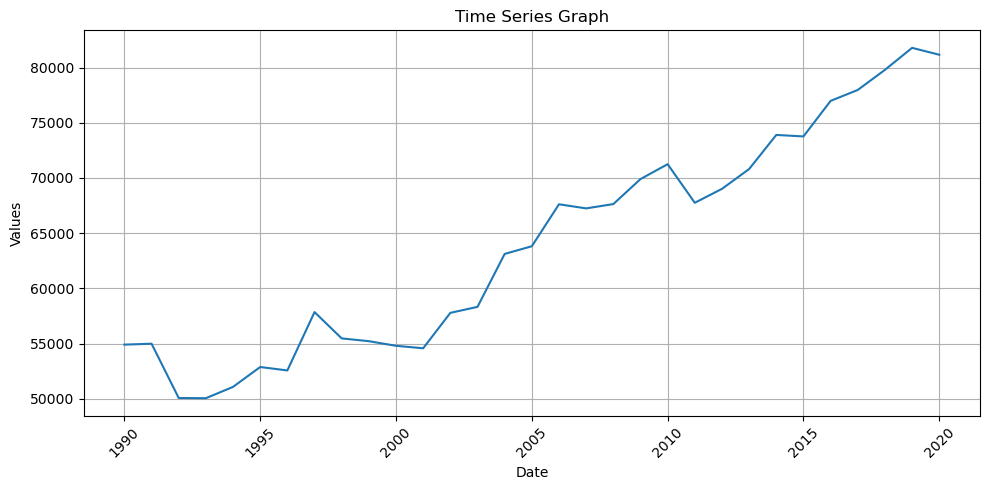

In [54]:
# Plotting the time series

plt.figure(figsize=(10, 5))
plt.plot(group_by_year['Year'], group_by_year['total_emission'])
plt.title('Time Series Graph')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
